                             Score
SVM                         0.9250
XGBRFClassifier             0.9250
KNeighborsClassifier        0.9125
XGBClassifier               0.9125
RandomForestClassifier      0.8875
AdaBoostClassifier          0.8875
LogisticRegression          0.8625
GradientBoostingClassifier  0.8625
DecisionTreeClassifier      0.8375
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        52
           1       0.81      0.89      0.85        28

    accuracy                           0.89        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



Text(0.5, 1.0, 'Confusion Matrix')

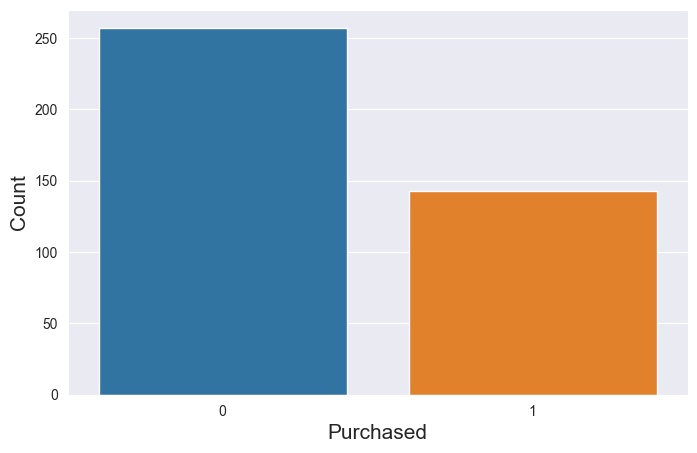

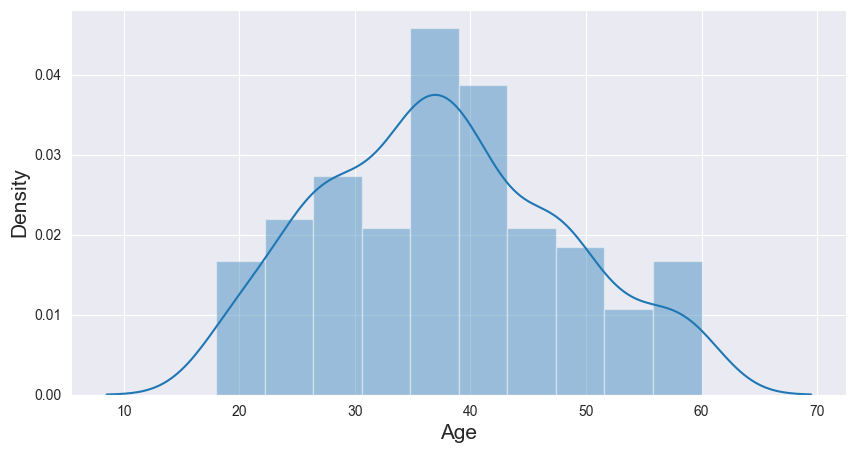

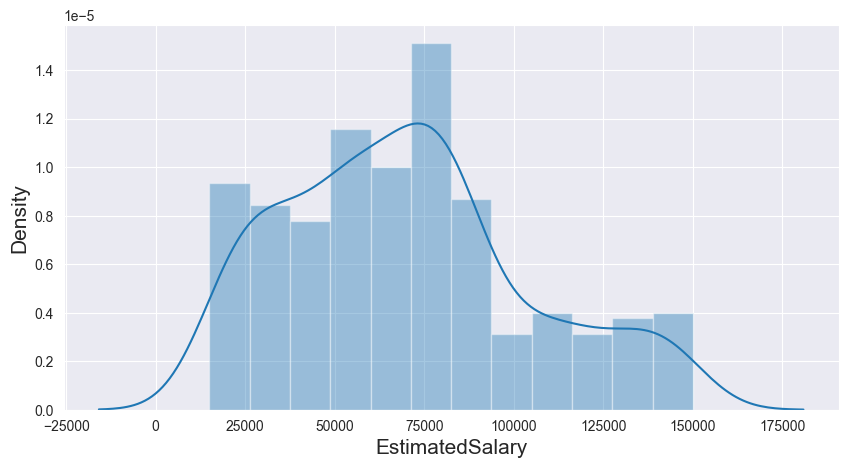

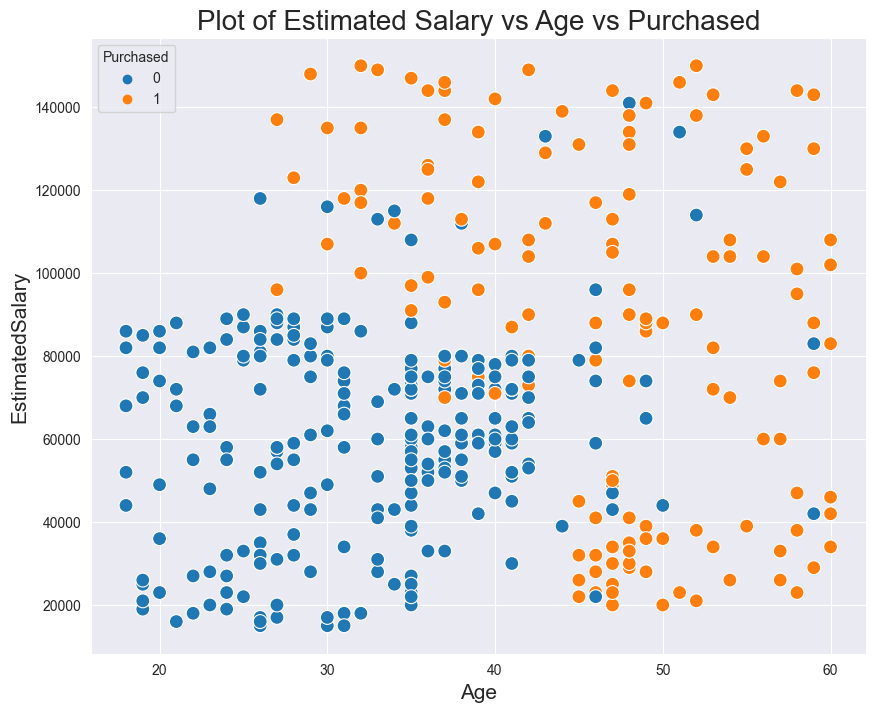

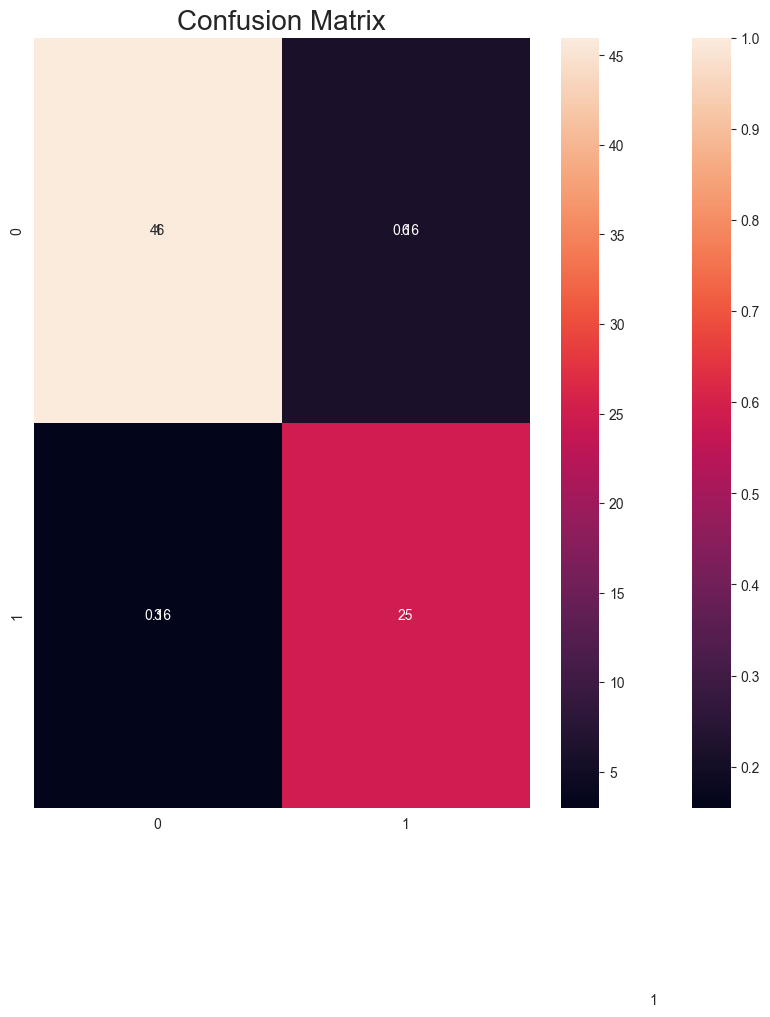

In [13]:
# Importing required libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scikitplot.metrics import plot_roc_curve
from xgboost import XGBClassifier, XGBRFClassifier

# Ignore warnings
warnings.filterwarnings('ignore')

# Setting seaborn style
sns.set_style('darkgrid')

# Reading data
df = pd.read_csv('Social_Network_Ads.csv')

# Displaying first 5 rows
df.head()

# Checking shape of data
df.shape

# Checking null values
df.isnull().sum()

# Describing data
df.describe()

# Value count of purchased
purch = df.Purchased.value_counts()

# Barplot of purchased
plt.figure(figsize=(8, 5))
sns.barplot(x=purch.index, y=purch);
plt.xlabel('Purchased', fontsize=15)
plt.ylabel('Count', fontsize=15);

# Distribution plot of age
plt.figure(figsize=(10, 5))
sns.distplot(df['Age'])
plt.xlabel('Age', fontsize=15)
plt.ylabel('Density', fontsize=15);

# Distribution plot of EstimatedSalary
plt.figure(figsize=(10, 5))
sns.distplot(df['EstimatedSalary'])
plt.xlabel('EstimatedSalary', fontsize=15)
plt.ylabel('Density', fontsize=15);

# Scatter plot of age, estimated salary and purchased
plt.figure(figsize=(10,8))
plt.title('Plot of Estimated Salary vs Age vs Purchased', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('EstimatedSalary', fontsize=15)
sns.scatterplot(data=df,x='Age',y= 'EstimatedSalary', hue='Purchased', s=100);

# Correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

# Independent and dependent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.head()
y.head()

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def scores(m, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    ms = {}
    
    for n, model in m.items():
        model.fit(X_train,y_train)
        ms[n] = model.score(X_test,y_test)

    ms = pd.DataFrame(ms, index=['Score']).transpose()
    ms = ms.sort_values('Score', ascending=False)
        
    return ms
#Defining models
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
'KNeighborsClassifier': KNeighborsClassifier(),
'SVM': SVC(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'RandomForestClassifier': RandomForestClassifier(),
'AdaBoostClassifier': AdaBoostClassifier(),
'GradientBoostingClassifier': GradientBoostingClassifier(),
'XGBClassifier': XGBClassifier(),
'XGBRFClassifier': XGBRFClassifier()}

#Calculating scores of models
scores_df = scores(models, X_train, X_test, y_train, y_test)
print(scores_df)

#Training Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=10)
rfc.fit(X_train, y_train)

#Classification report
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix', fontsize=20)

